In [ ]:
url = 'https://github.com/Sameep-c/DS203-proj/blob/main/heart.csv?raw=true'
import pandas as pd 
df = pd.read_csv(url)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


NOTE:


*   Age : Age of the patient
*   Sex : Sex of the patient (1 = male, 0 = female)
* exang: exercise induced angina (1 = yes; 0 = no)
* ca: number of major vessels (0-3) which get colored in MR fluoroscopy
* cp : Chest Pain type 
  * Value 0: typical angina
  * Value 1: atypical angina
  * Value 2: non-anginal pain
  * Value 3: asymptomatic
* trtbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results
  * Value 0: normal
  * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* slope: slope of the peak exercise ST segment
* oldpeak: ST depression induced by exercise
* thal (Thalassemia):
  * Value 0: Condition not known 
  * Value 1: Permanent defect 
  * Value 2: Normal blood flow
  * Value 3: Reversible defect 
* thalach : maximum heart rate achieved
* target : 0 = no CVD, 1 = CVD present



In [ ]:

import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rc('legend',fontsize=20) 
plt.rc('legend',fontsize='medium') 
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
sns.set_style('darkgrid')
plt.rcParams['font.family'] = 'Helvetica'
sns.set_context("notebook")

In [ ]:
columns = df.shape[1]
rows = df.shape[0]
print(f'Number of Record: {rows}')
print('Number of Variables: {}'.format(columns))

Number of Record: 303
Number of Variables: 14


In [ ]:
for col in df.columns:
    if df[col].isnull().values.any():
        print('There are {} NAN values in {}'.format(df[col].isnull().sum(),col))

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There are no null values in any of the columns

In [ ]:
for var in df.columns:
    print('There are {} unique values in {}'.format(len(pd.unique(df[var])), var.title()))

There are 41 unique values in Age
There are 2 unique values in Sex
There are 4 unique values in Cp
There are 49 unique values in Trestbps
There are 152 unique values in Chol
There are 2 unique values in Fbs
There are 3 unique values in Restecg
There are 91 unique values in Thalach
There are 2 unique values in Exang
There are 40 unique values in Oldpeak
There are 3 unique values in Slope
There are 5 unique values in Ca
There are 4 unique values in Thal
There are 2 unique values in Target


Conclusion: 

We will consider sex,cp,fbs,restecg,exang,slope,ca,thal,target as discrete variables

We will consider age,trestbps,chol,thalach,oldpeak as continuous variables


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


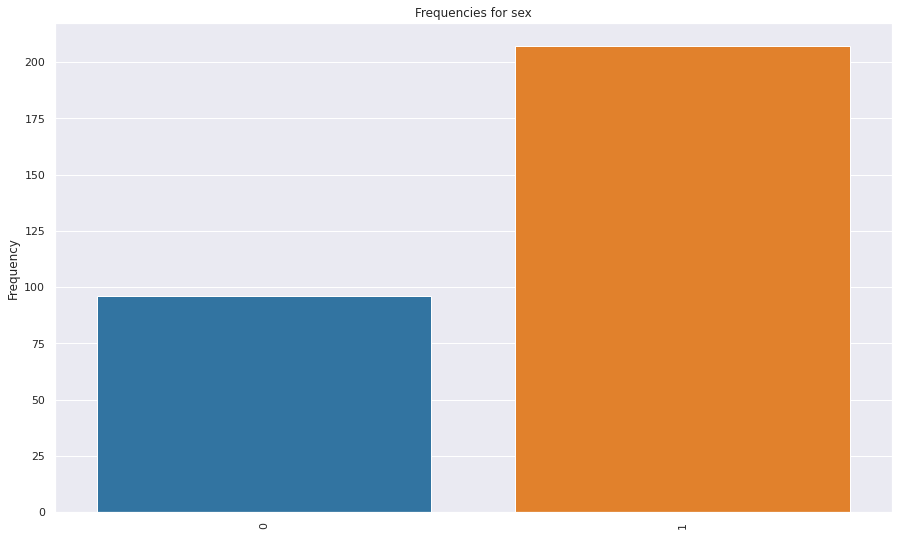

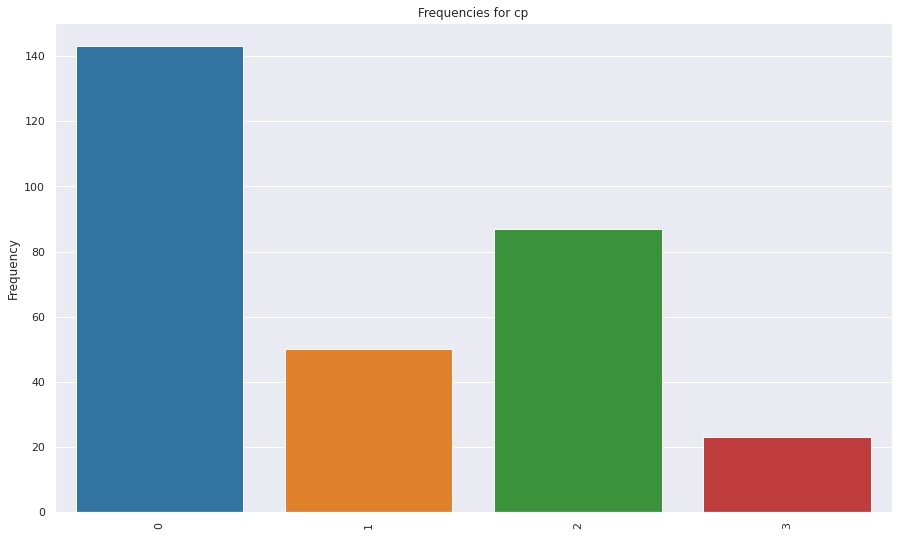

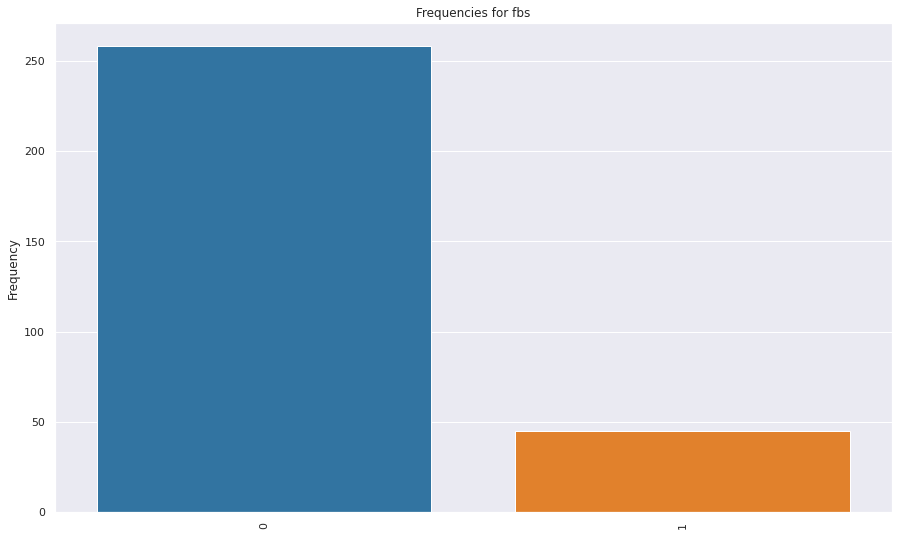

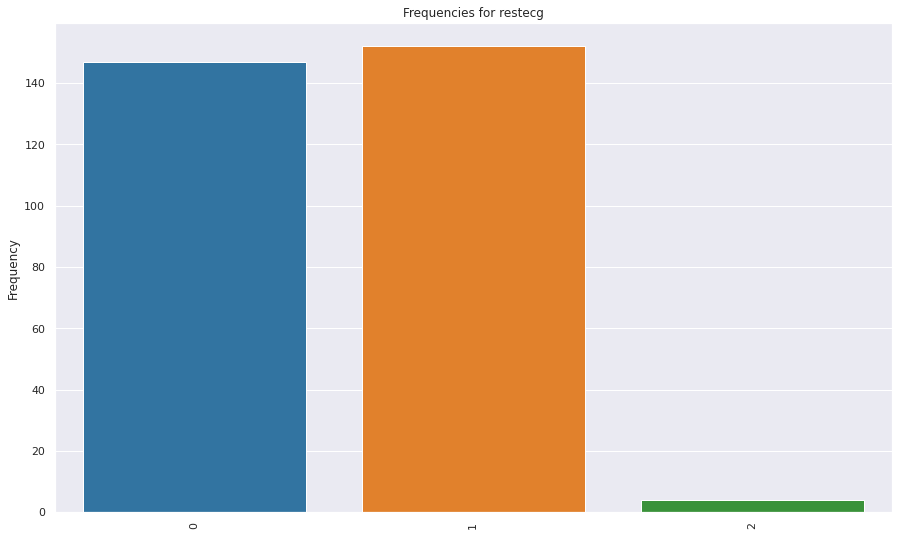

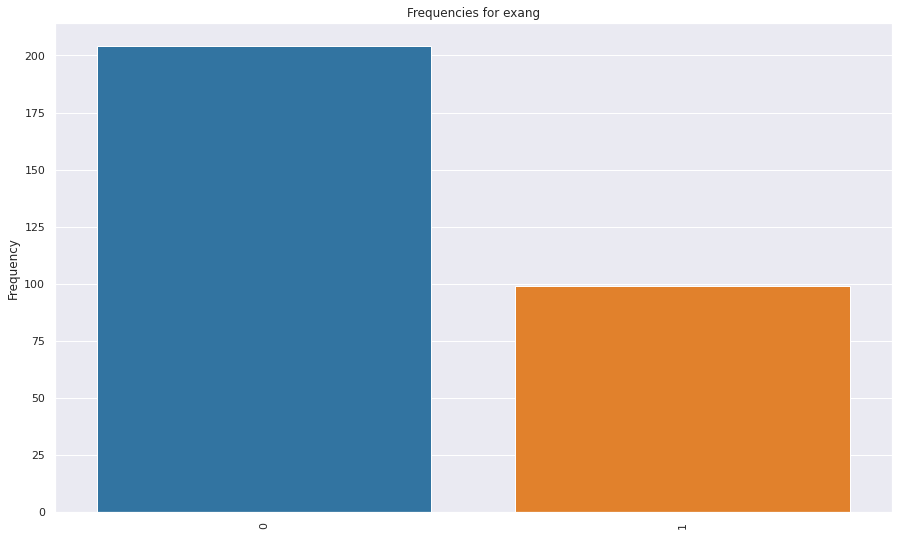

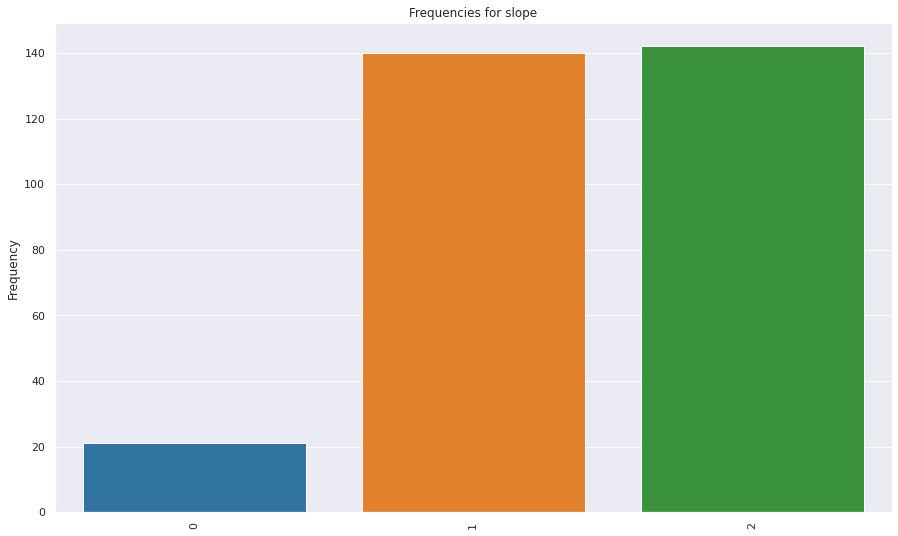

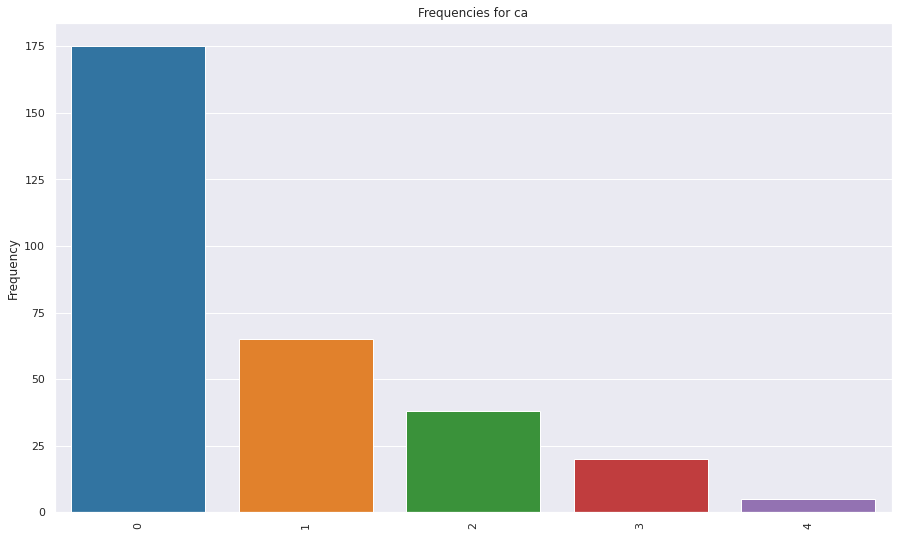

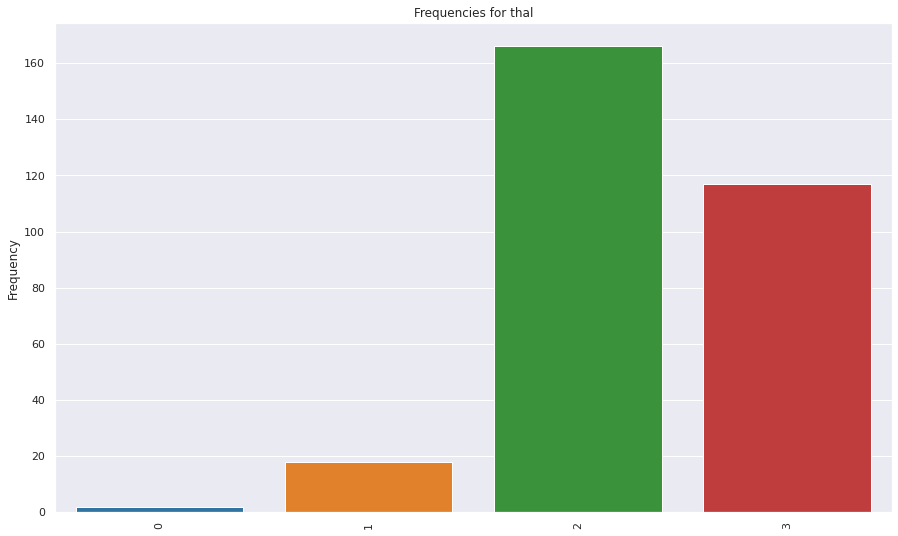

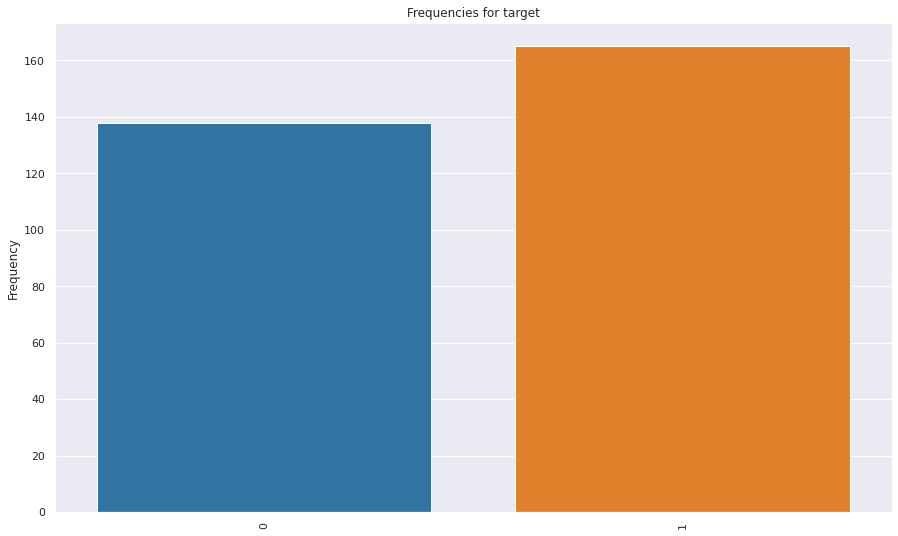

In [ ]:
categorical = ['sex', 'cp', 'fbs','restecg','exang','slope','ca','thal','target']
continuous=['oldpeak','age','trestbps','chol','thalach']
for i in range(len(categorical)):
     plt.figure(figsize = (12,7))
     df1 = df[categorical[i]].value_counts().to_dict()
     x  = list(df1.keys())
     y  = list(df1.values())
     plt.xticks(rotation = 90)
     plt.title('Frequencies for {}'.format(categorical[i]))
     ax = sns.barplot(x = x, y = y)
     ax.set(xlabel='',ylabel='Frequency')

    
    

Conclusion: 

In our survey, there are more males than females.

Most have typical angina, normal fbs.

Most have an ST-T wave abnormality.

Most do not have an exercise induced angina or any major compromised blood vessels.

However, most of our patients do have a high chance of facing a heart attack.

Thus, despite lesser symptoms, a person may be predisposed to getting a heart attack and there is need to study the combinations of symptoms further.

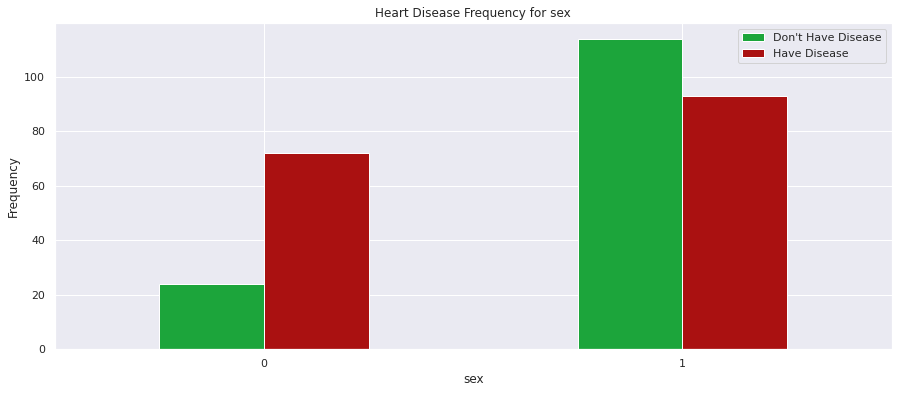

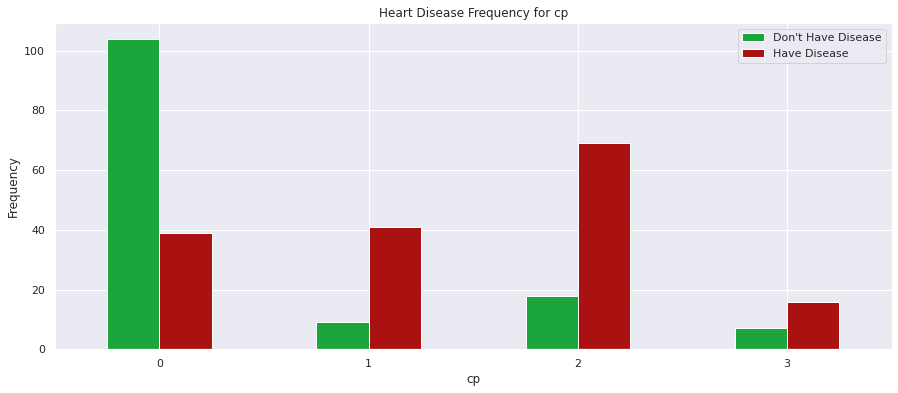

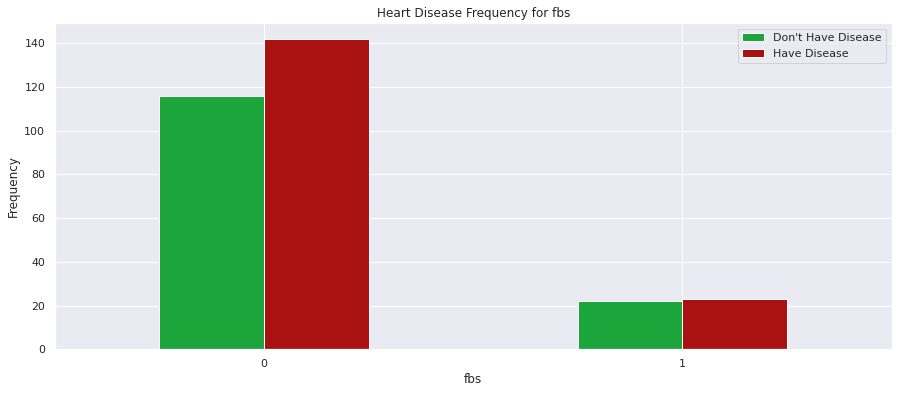

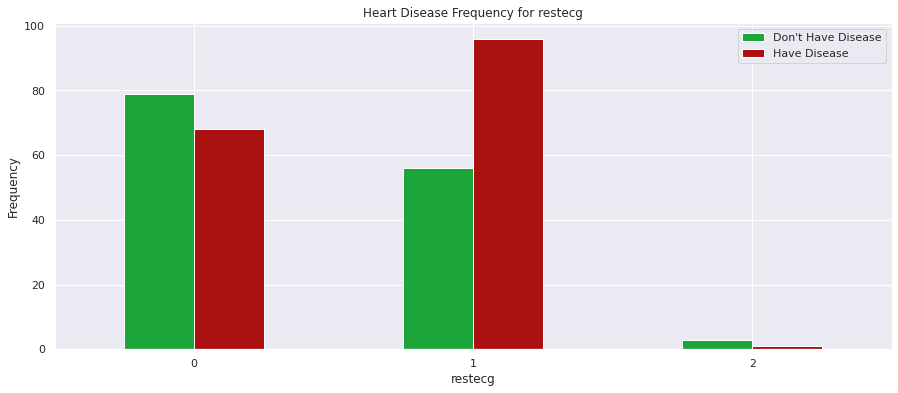

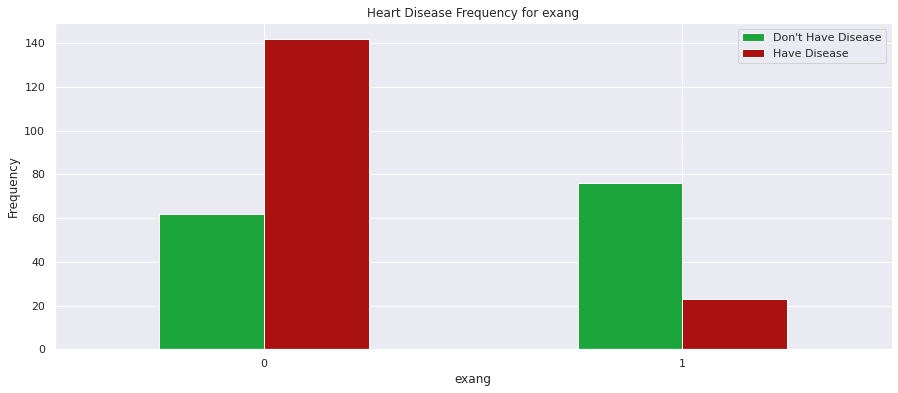

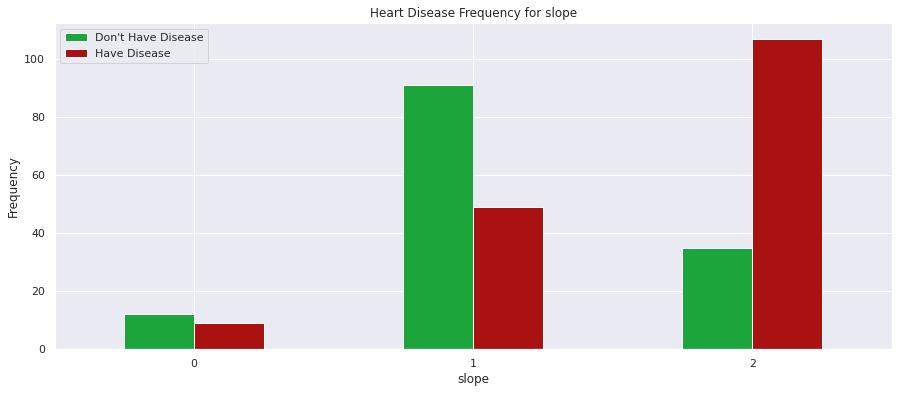

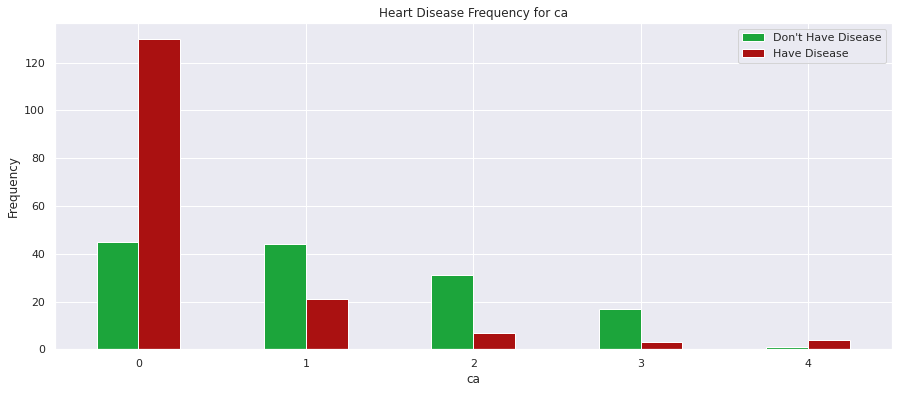

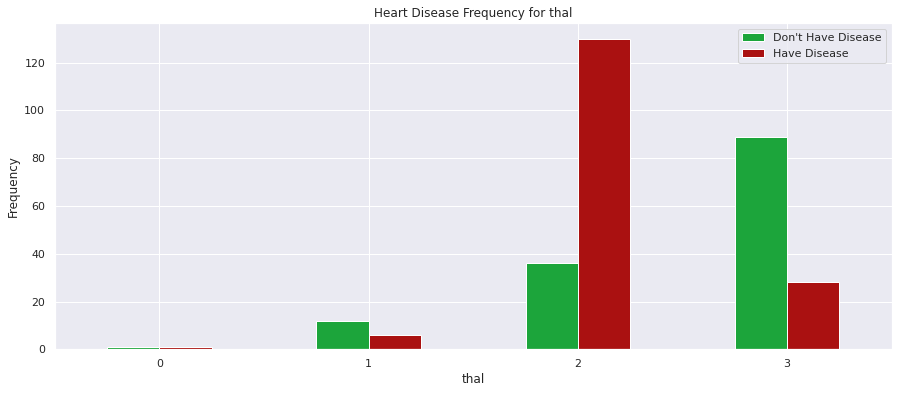

In [ ]:
categ = ['sex', 'cp', 'fbs','restecg','exang','slope','ca','thal']
for i, col in enumerate(categ):
  pd.crosstab(df[col],df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
  plt.title('Heart Disease Frequency for {}'.format(col))
  #plt.xlabel('Sex (0 = Female, 1 = Male)')
  plt.xticks(rotation=0)
  plt.legend(["Don't Have Disease", "Have Disease"])
  plt.ylabel('Frequency')
  plt.show()

Conclusion:

Here we have studied the probability of getting a heart attack based on the symptoms faced. The various discrete variables have been examined, along with the number of patients who have the symptoms and do/do not have the disease.



In [ ]:
df.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64

In [ ]:
df.var()

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



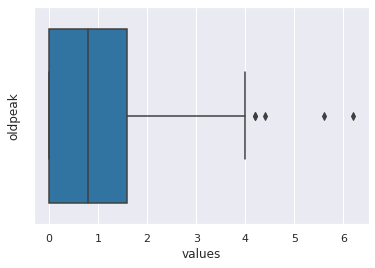

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



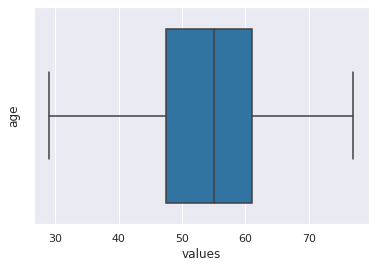

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



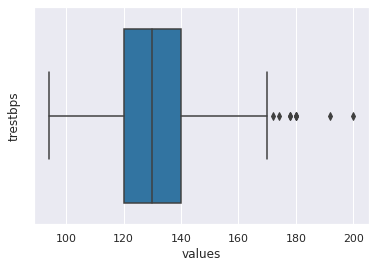

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



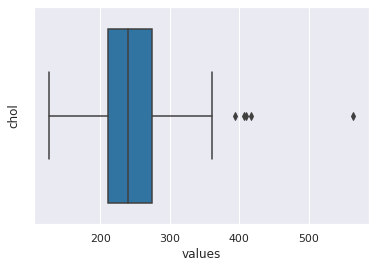

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



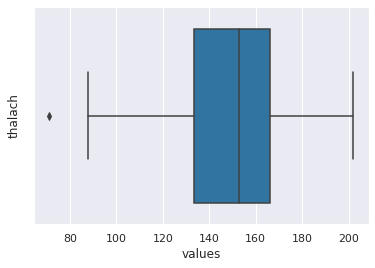

In [ ]:

for i,col in enumerate(continuous):
 sns.boxplot(df[col])
 plt.ylabel(col)
 plt.xlabel('values')
 plt.show()
 print(' ')

Here, we try to further study the distributions of the continuous variables.

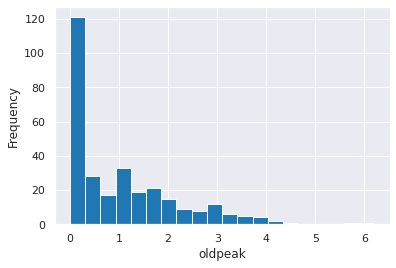

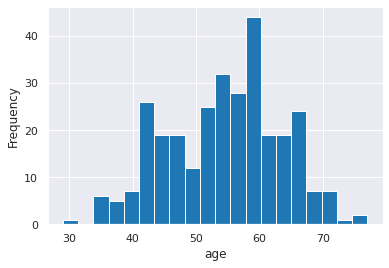

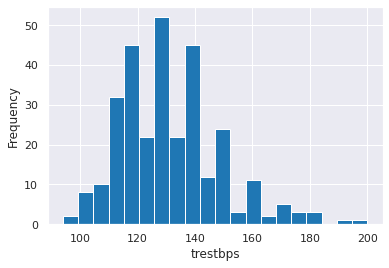

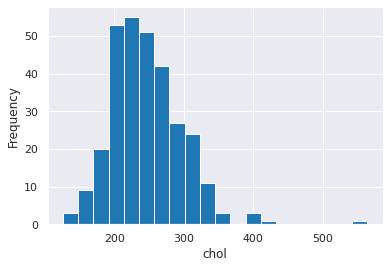

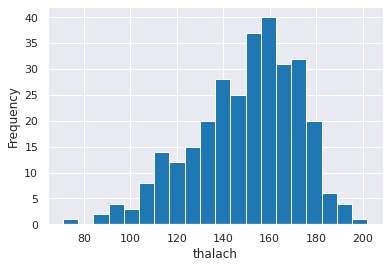

In [ ]:
#continuous=['oldpeak','age','trtbps','chol','thalachh']
for i,col in enumerate(continuous):
 df[col].hist(bins=20)
 plt.xlabel(col)
 plt.ylabel('Frequency')
 plt.show()
 print(" ")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

IndexError: ignored

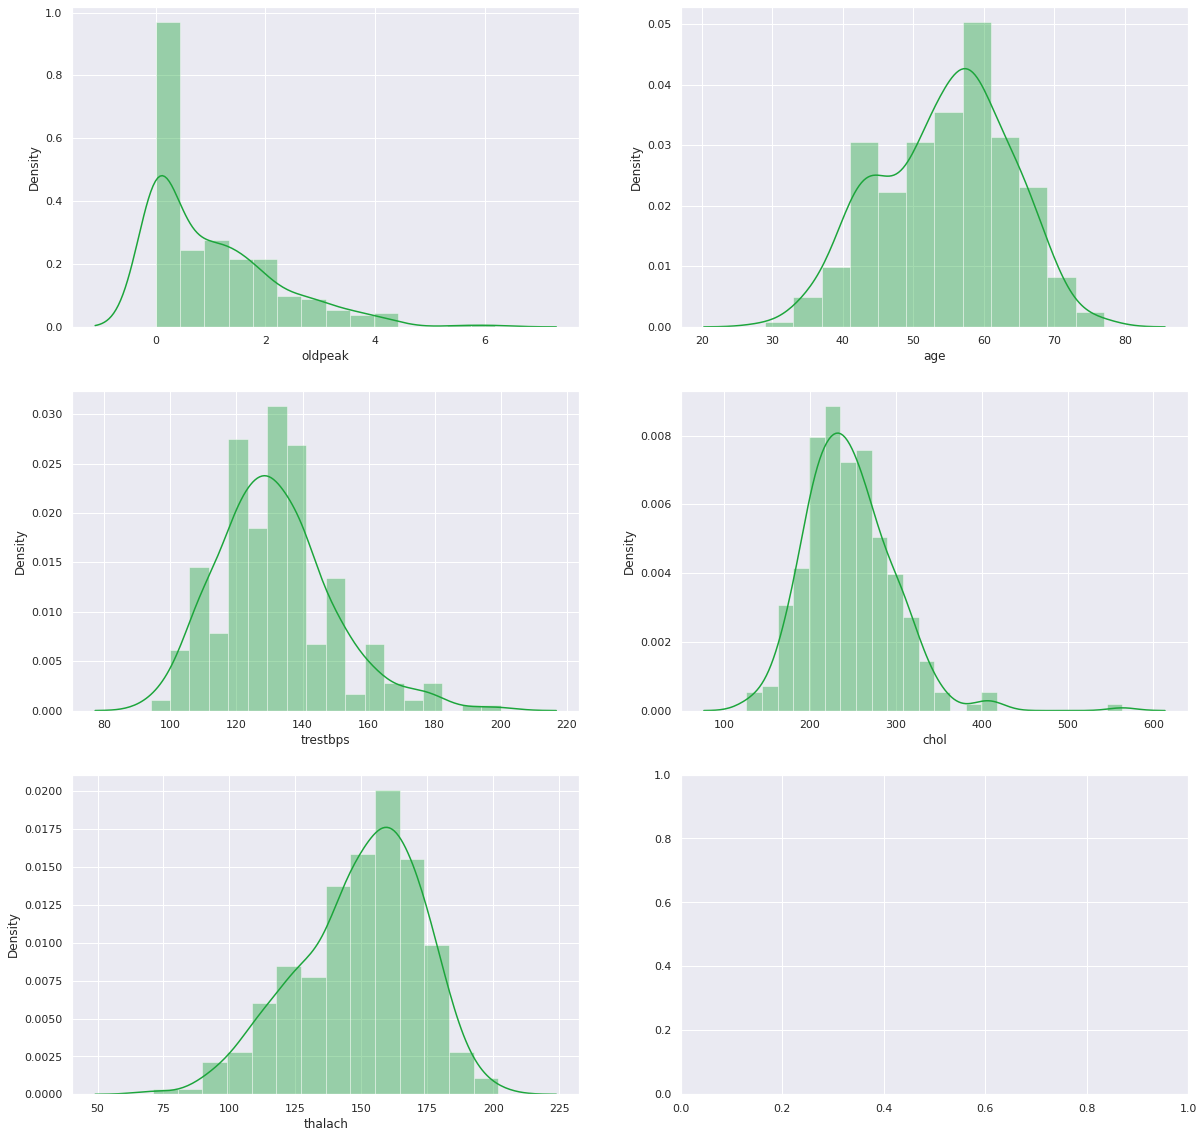

In [ ]:
fig, ax1 = plt.subplots(3,2, figsize=(20,20))
k = 0
for i in range(3):
    for j in range(2):
            sns.distplot(df[continuous[k]], ax = ax1[i][j], color = '#1CA53B')
            k += 1
plt.show()
#isnt this the same as histogram

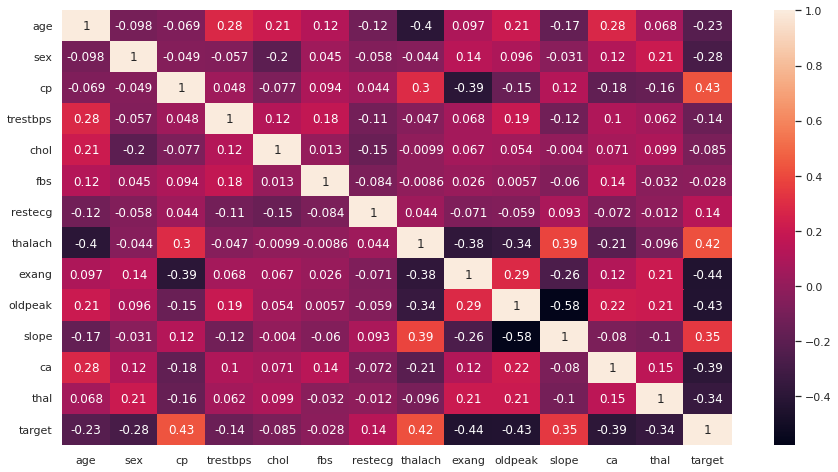

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
#continuous=['oldpeak','age','trtbps','chol','thalachh']
sb.heatmap(df.corr(), annot=True)
sb.set(rc = {'figure.figsize':(15,8)})
plt.show()

None of the variables are highly correlated. Thus, all are relevant for our analysis.

We need to know what the absolute best features to use are, and that’s when we use a Chi2 test.  The Chi2 test allows us to use categorical variables as well as numerical, whereas the correlational heatmap does not.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
A = df.drop('target', axis=1)
B = df['target']
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(A,B)
dfsc=pd.DataFrame(fit.scores_)
dfcl=pd.DataFrame(A.columns)
FtSc = pd.concat([dfcl,dfsc],axis=1)
FtSc.columns=['features','chi2 score']
print(FtSc.nlargest(10,'chi2 score'))

    features  chi2 score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835


The top 5 most important features according to chi 2 score are-
1. thalach 
2. oldpeak
3. ca
4. cp
5. exang





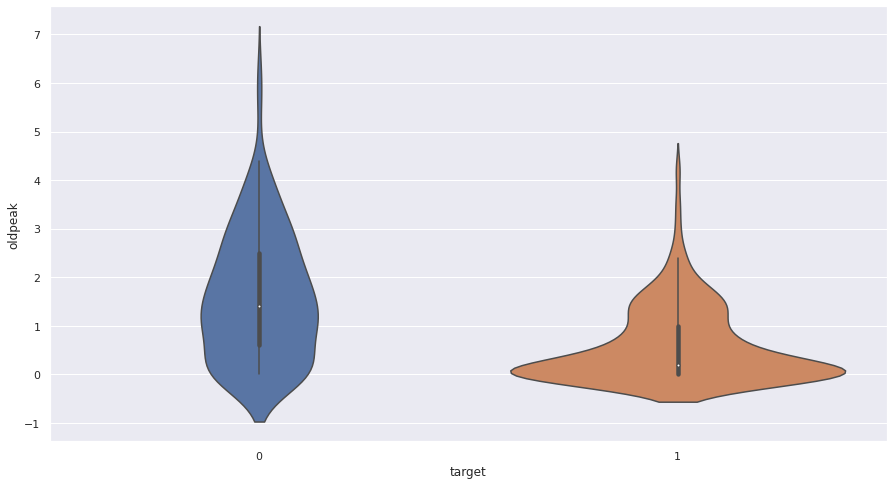

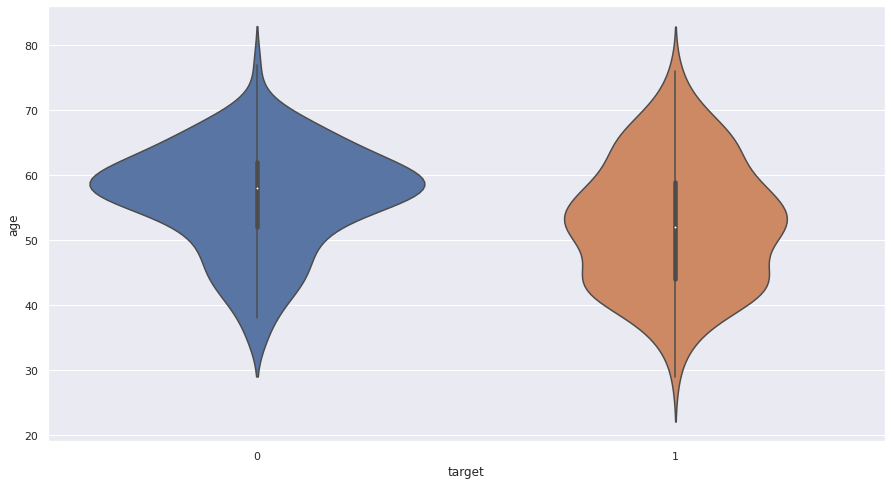

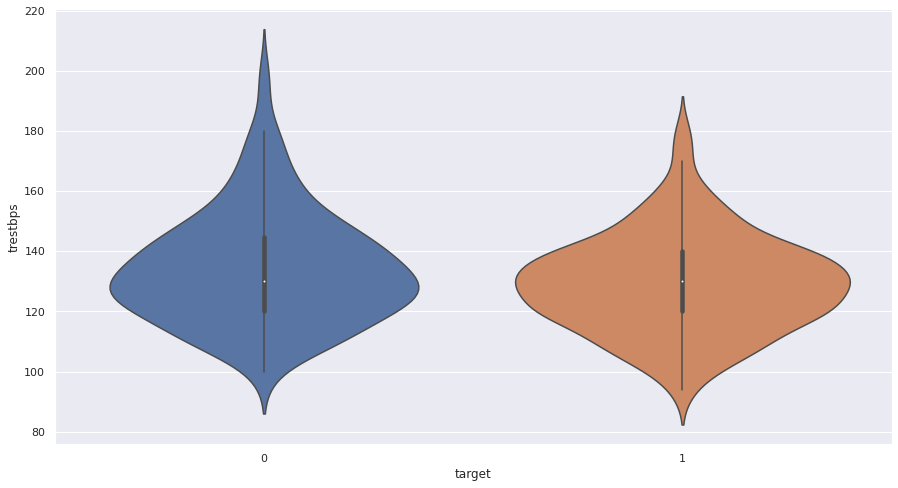

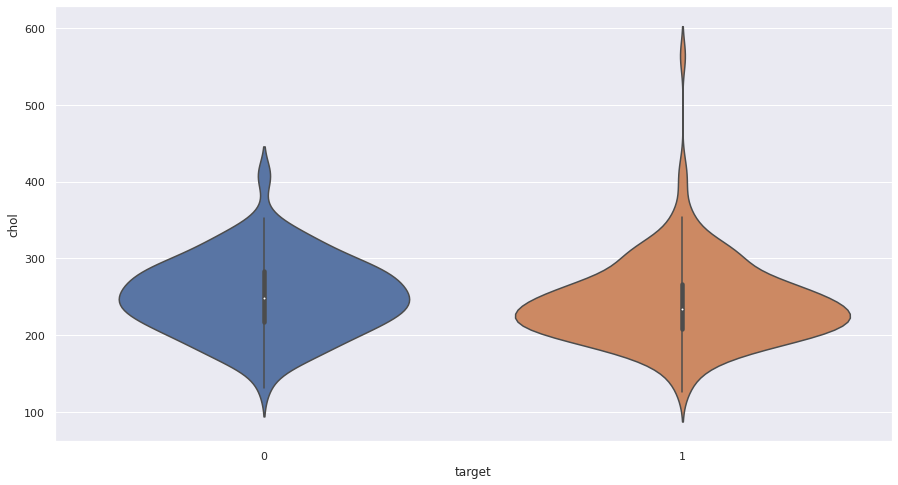

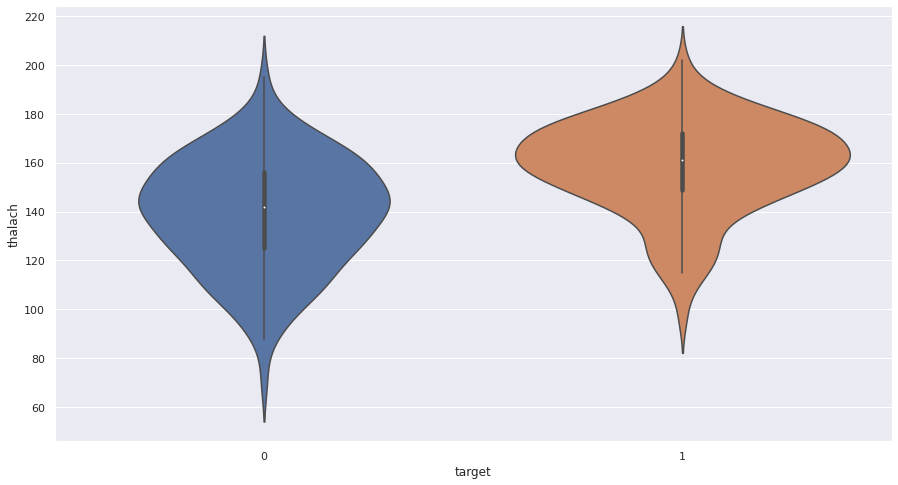

In [ ]:
import seaborn as sb
#continuous=['oldpeak','age','trtbps','chol','thalachh']
for i,col in enumerate(continuous):
 sb.violinplot(x = df['target'], y = df[col])
 plt.show()
 print(" ")


Conclusion:

Here, we have studied the distribution of the continuous variables, in regards to whether the patient gets heart disease or not.

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

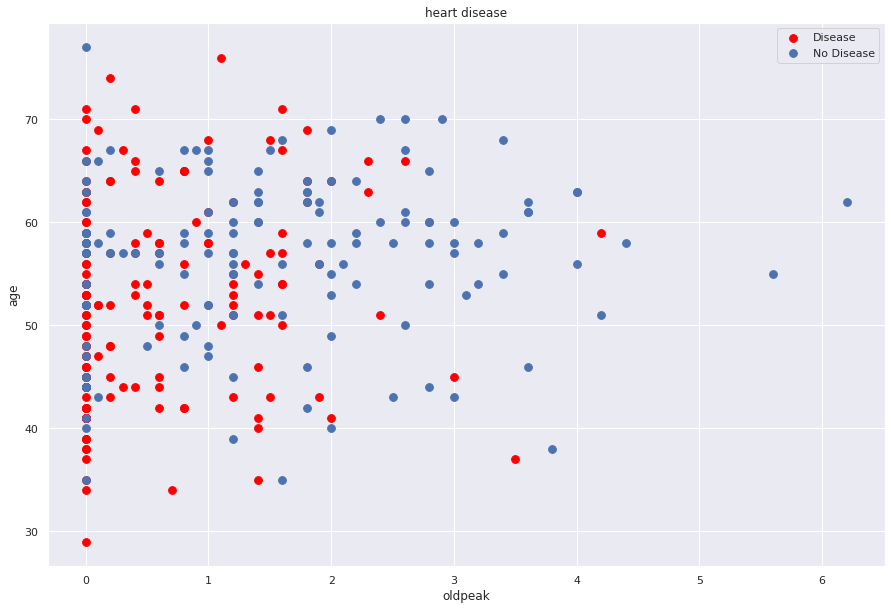

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

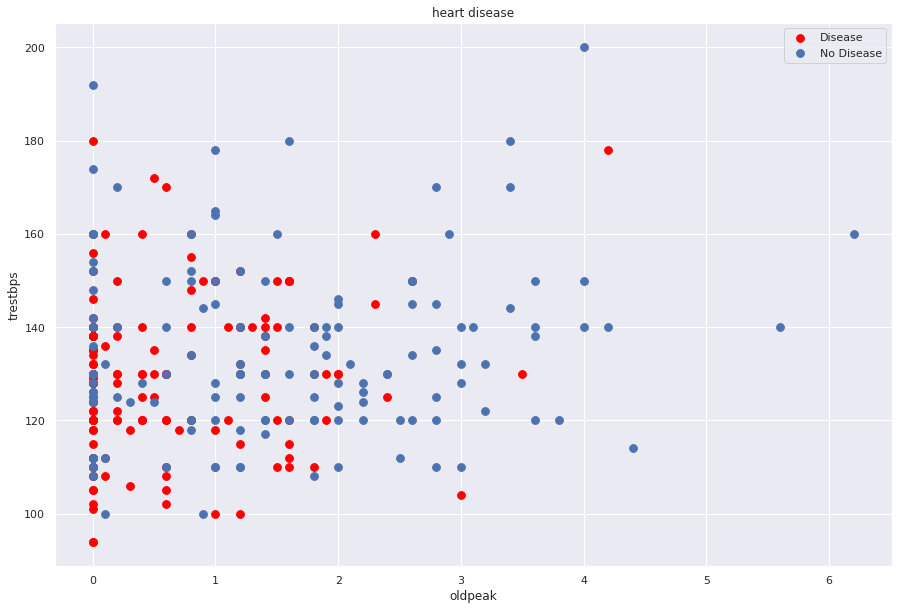

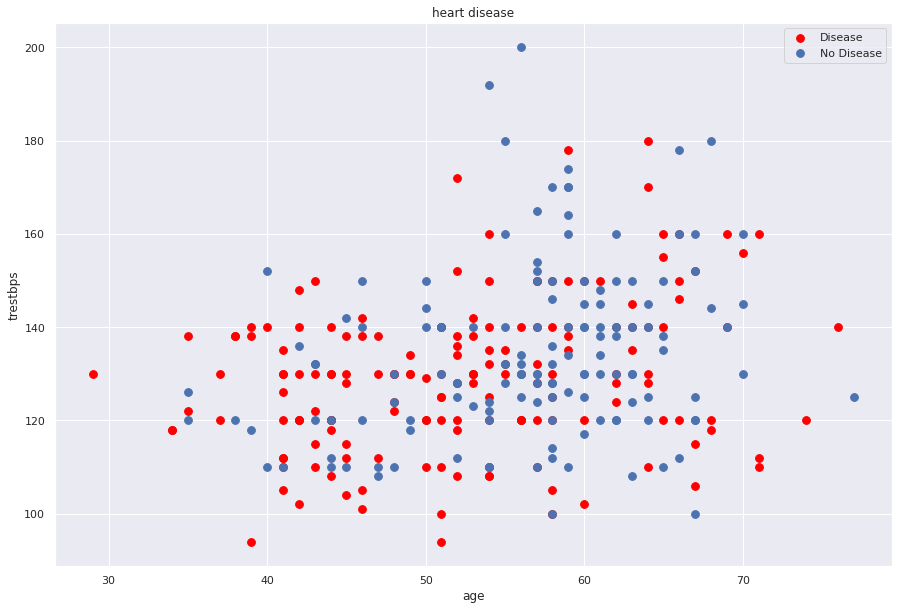

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

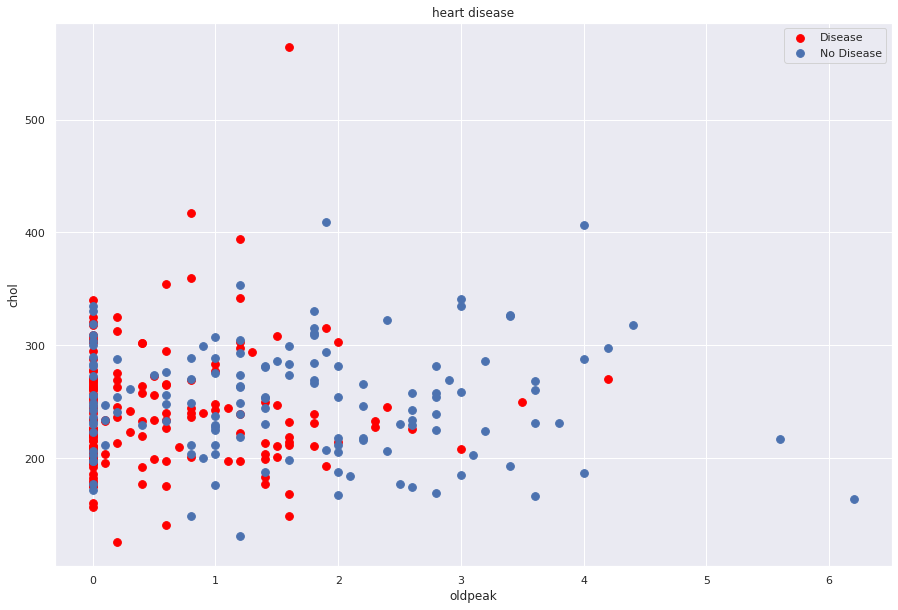

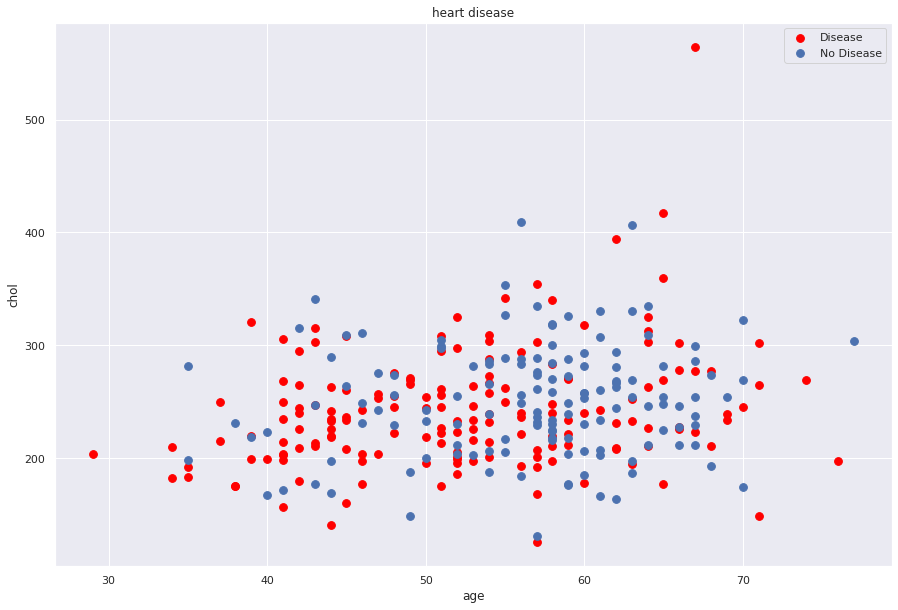

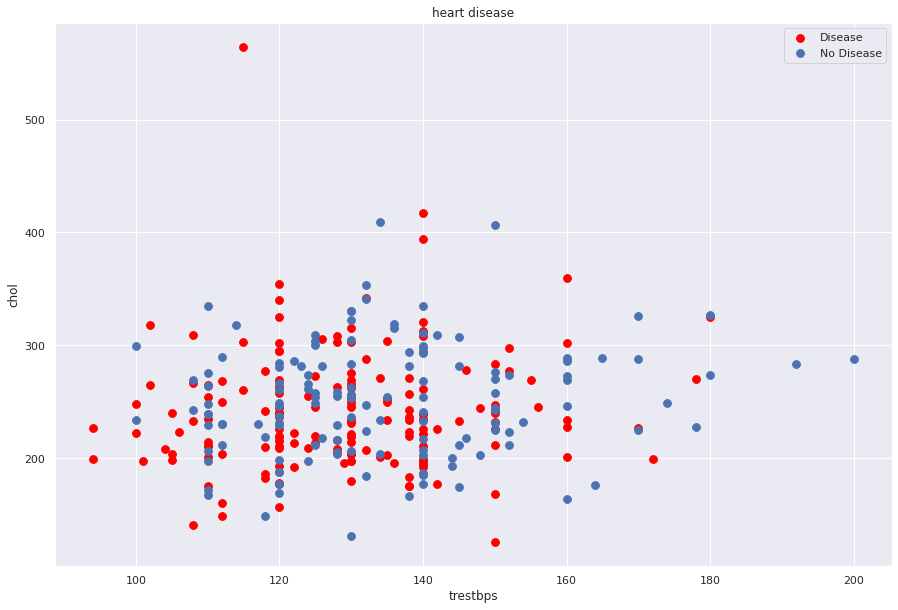

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

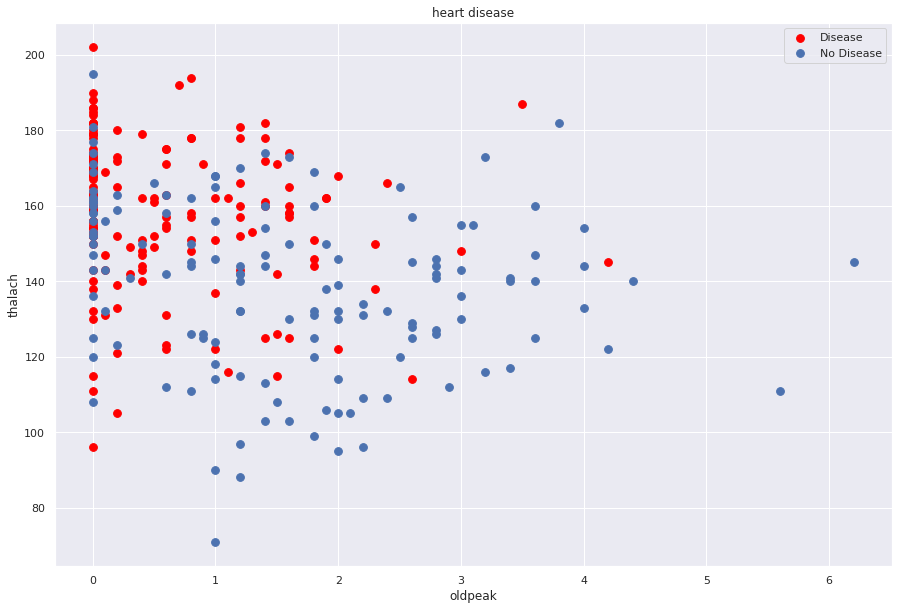

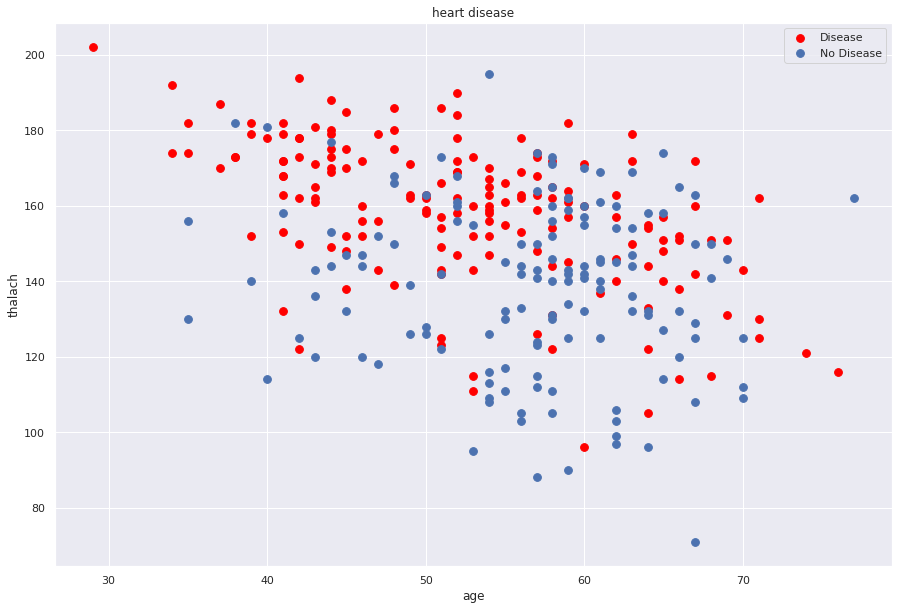

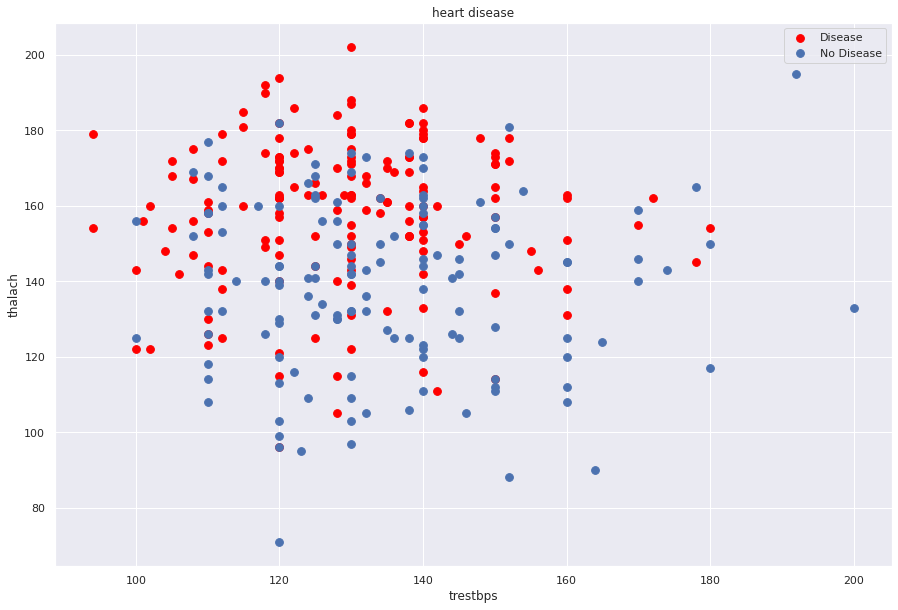

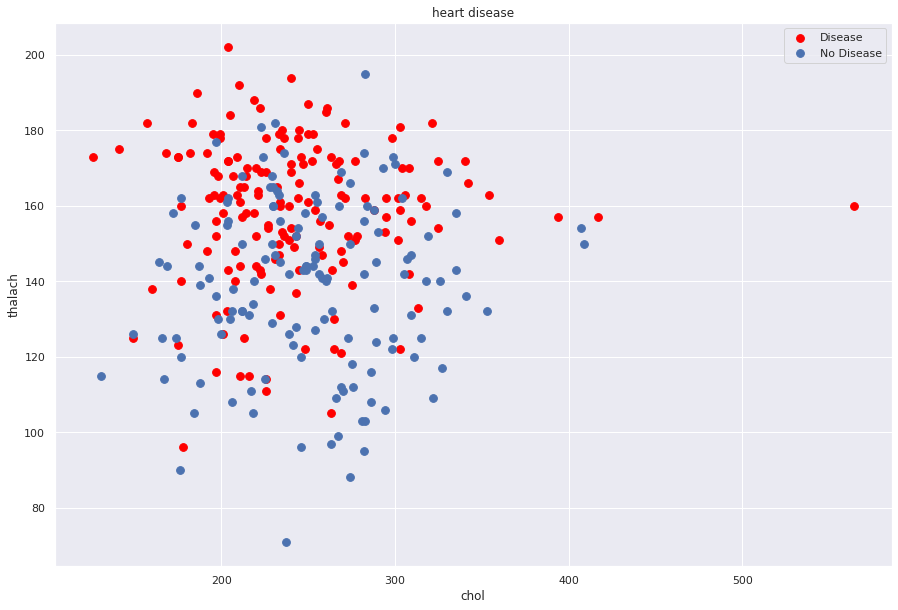

<Figure size 1080x720 with 0 Axes>

In [ ]:
#scatter plots of all continuous variable pairs

for j,colm in enumerate(continuous):
 for i,col in enumerate(continuous):
  plot = plt.figure(figsize = (15,10))
  if i<j:
   x = df[col]
   y = df[colm]
   #plt.scatter(x, y, color='red',s = df['target']*10 )
   plt.scatter(x=x[df.target==1], y=y[(df.target==1)], c="red", s=60)
   plt.scatter(x=x[df.target==0], y=y[(df.target==0)], s=60)
   plt.legend(["Disease", "No Disease"])
   plt.xlabel(col)
   plt.ylabel(colm)
   plt.title('heart disease')
   plt.show()
   print(" ")


#plt.xlabel("Age")
#plt.ylabel("Maximum Heart Rate");

CONCLUSION: We have analysed all pairs of continuous variables and the probability of getting heart disease according to their combinations.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



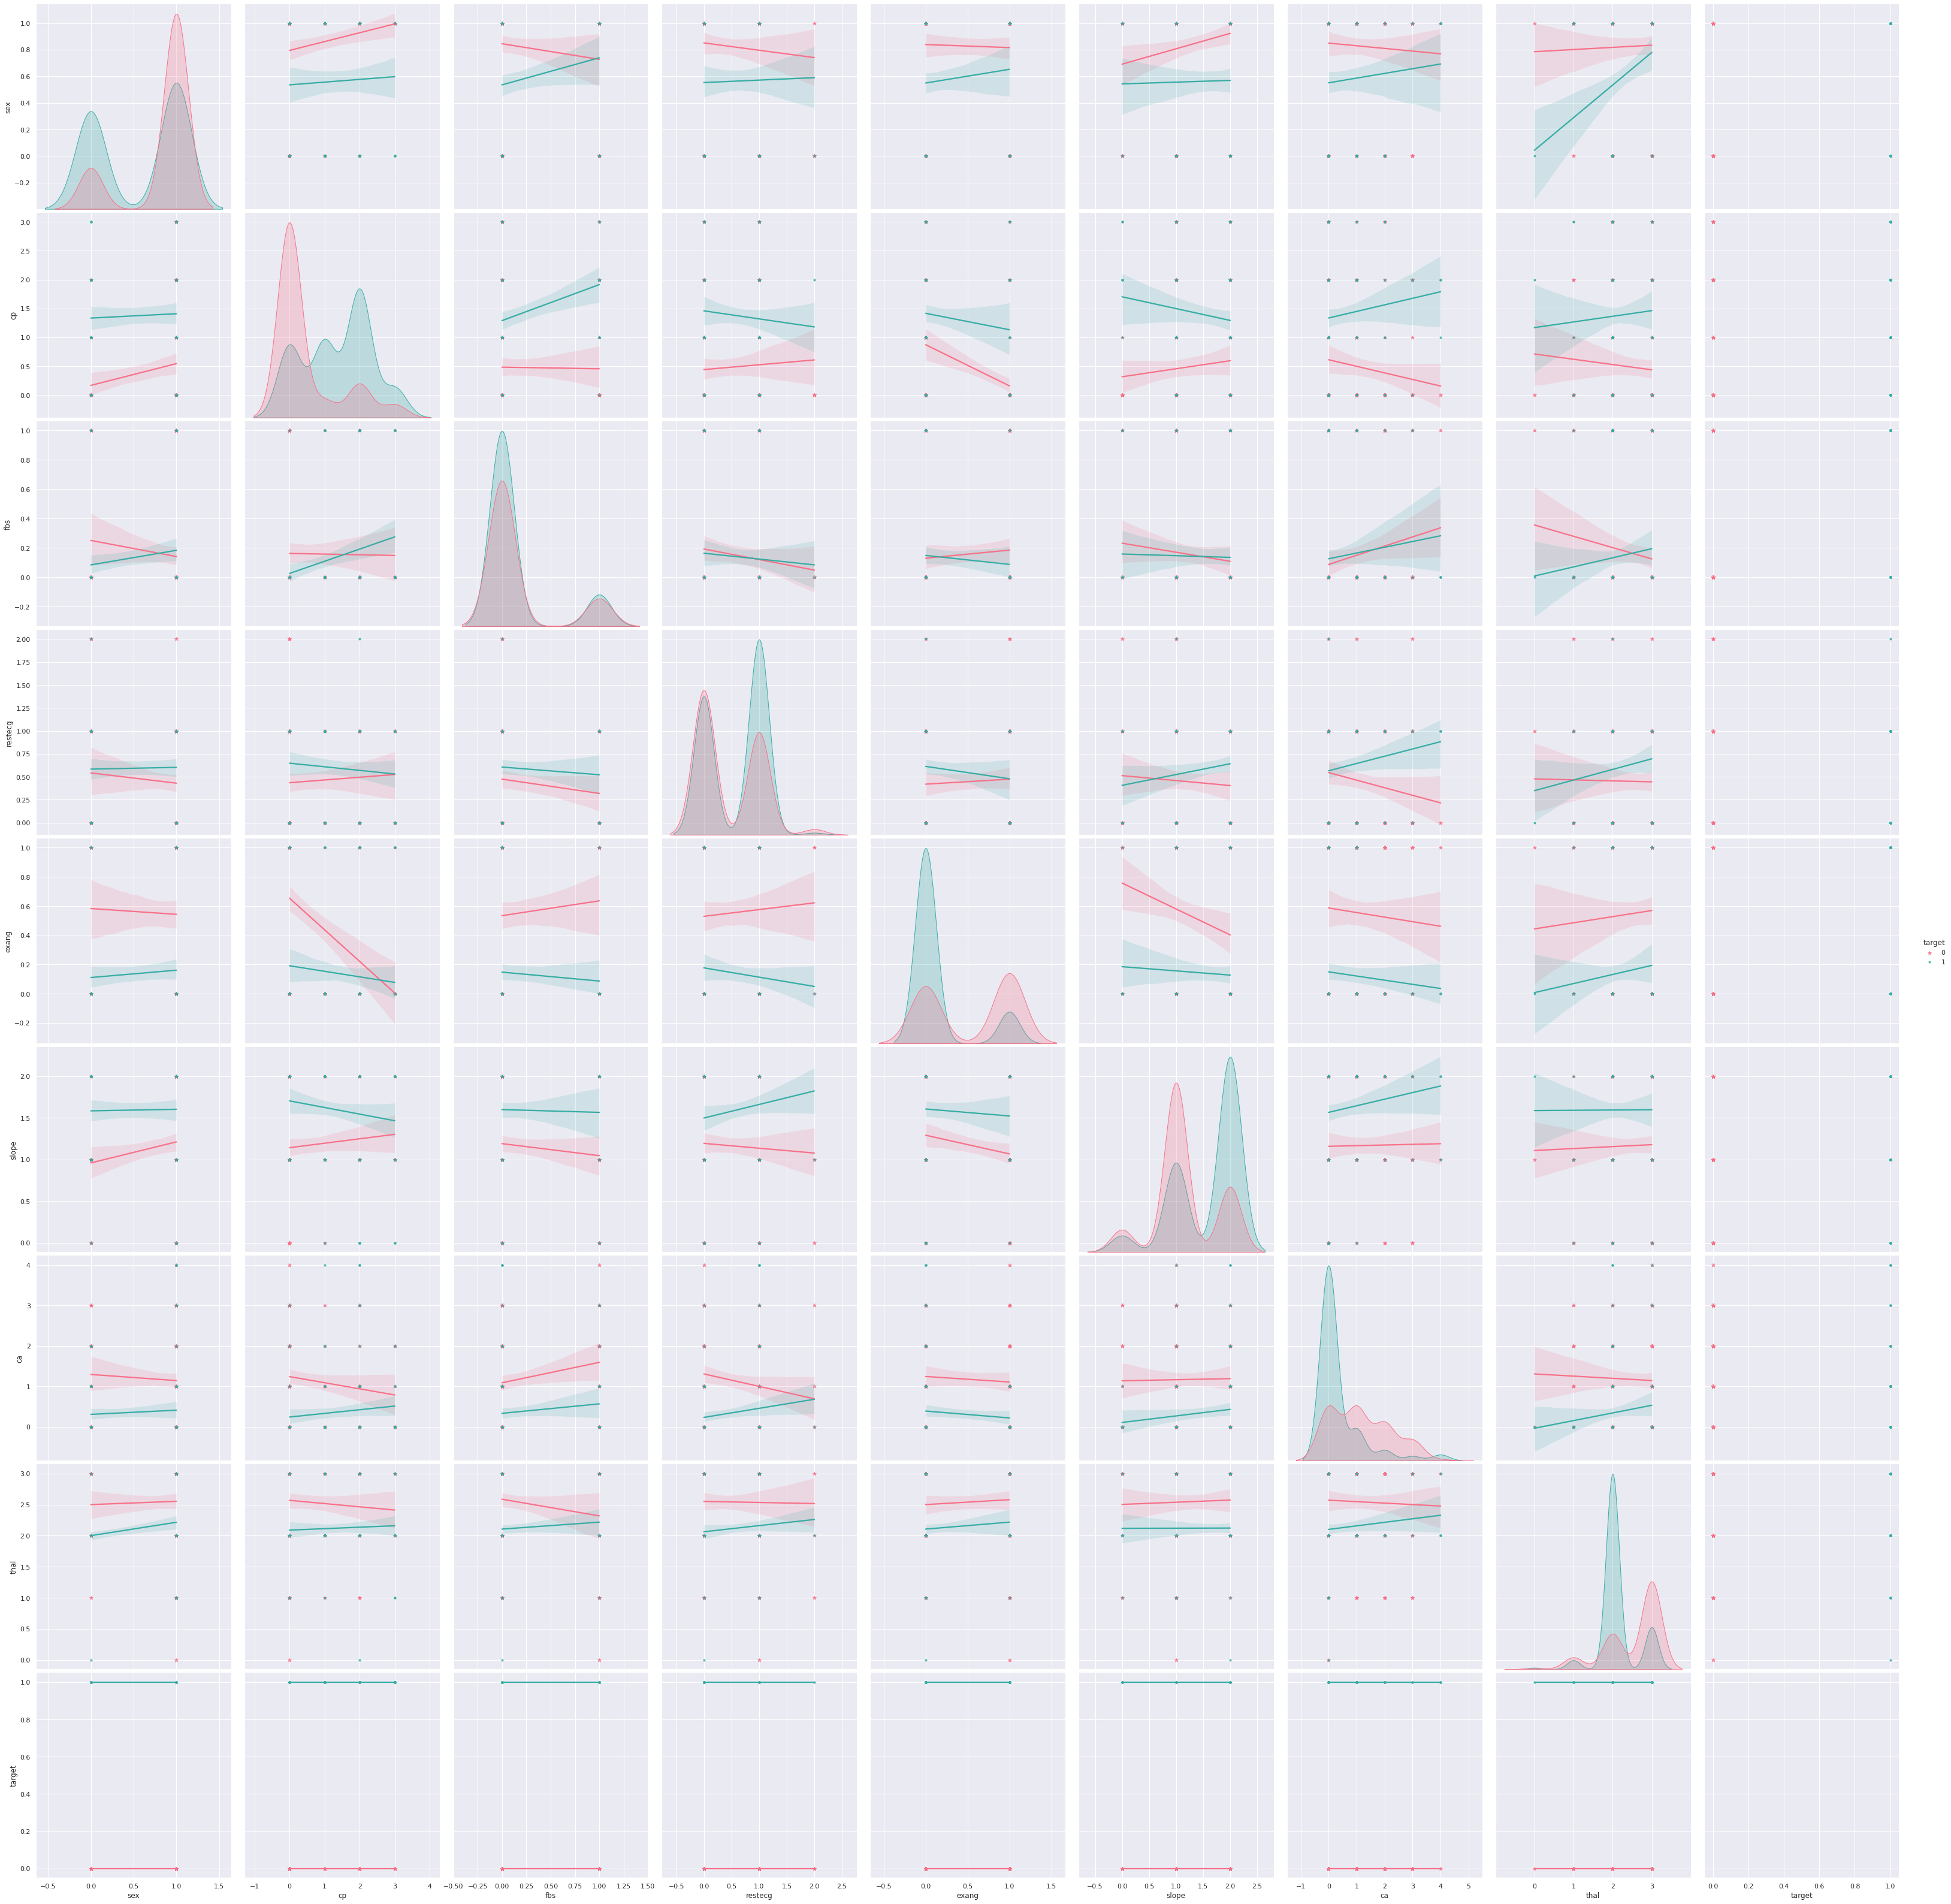

In [ ]:
sns.pairplot(data=df, vars=categorical, \
             hue='target', kind='reg', diag_kind='kde', markers=['*','.'], size=5, palette='husl')

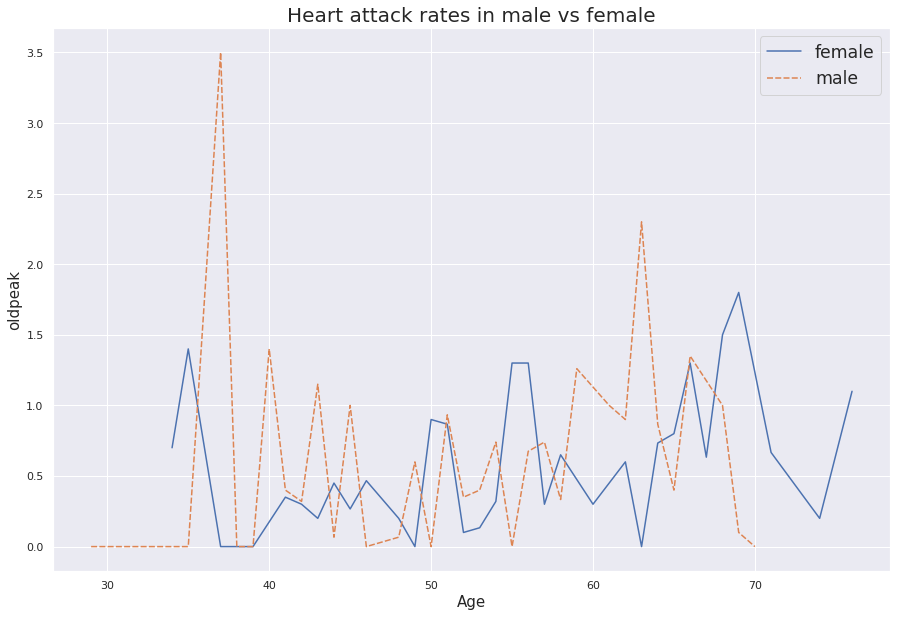

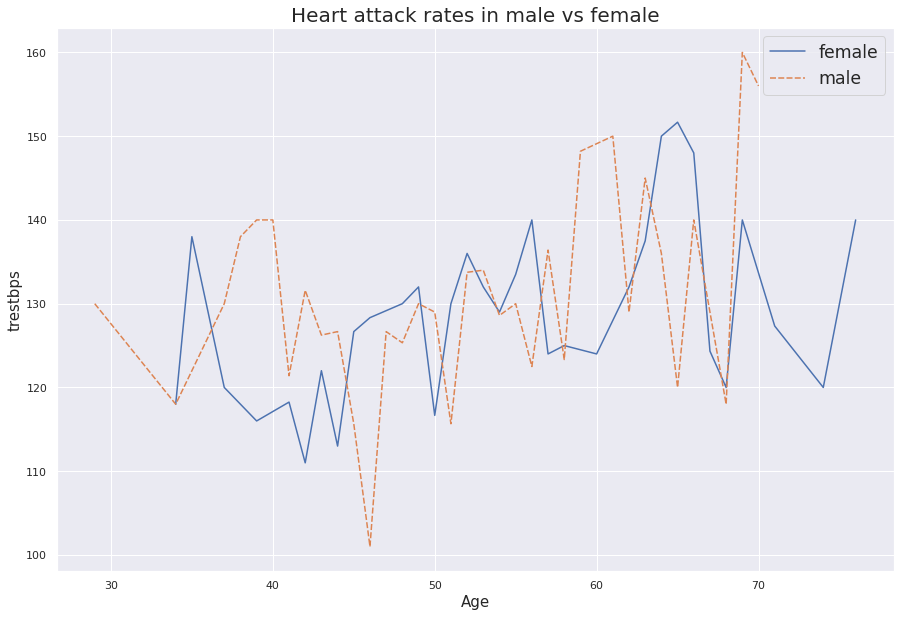

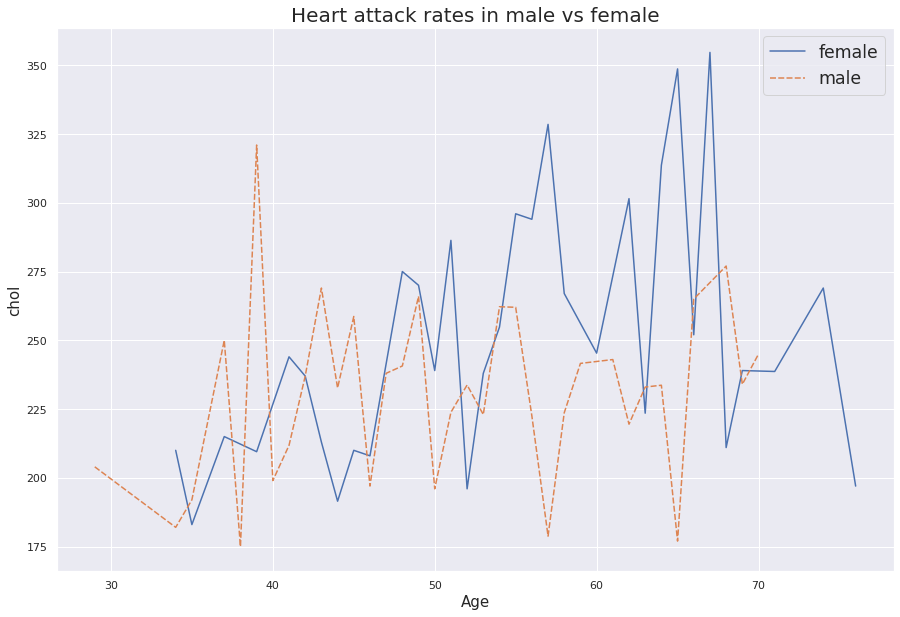

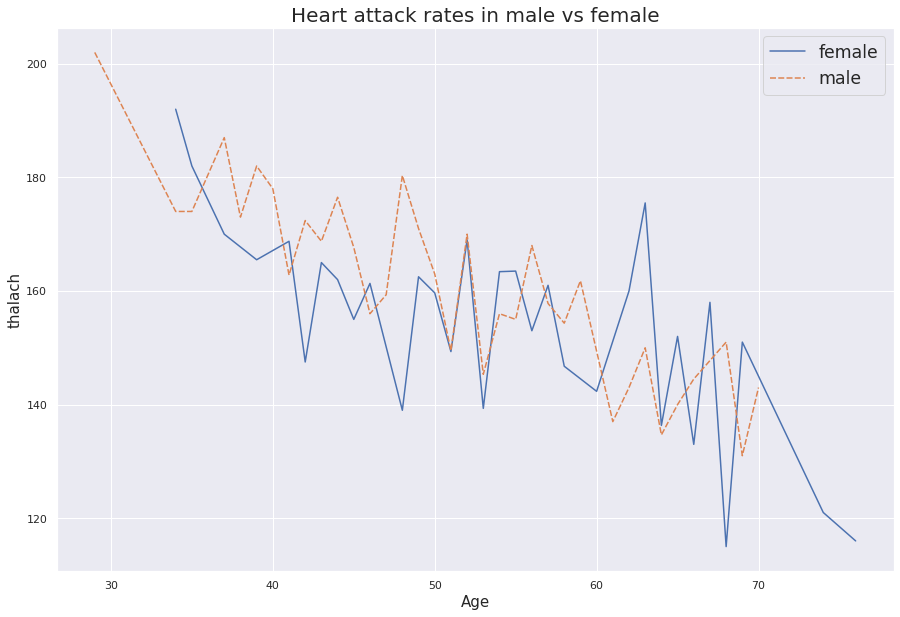

In [ ]:
#df2 = df.groupby(['sex','age']).sum()
con=['oldpeak','trestbps','chol','thalach']

colors = ['orange', 'blue']
df1=df[(df.target==1)]
for j,colm in enumerate(con):
  plot = plt.figure(figsize = (15,10))
  sns.lineplot(x = 'age', y = colm, hue='sex',  style="sex",err_style= None,data=df1)
  plt.legend(['female', 'male'], fontsize = 'x-large')
  plt.title('Heart attack rates in male vs female', fontsize = 20)
  plt.xlabel('Age', fontsize = 15)
  
  plt.ylabel('{}'.format(colm), fontsize = 15)
  plt.show()
  print(" ")
#fix y label

Conclusion: We have analysed the continuous variables along with the age of the person and then compared them

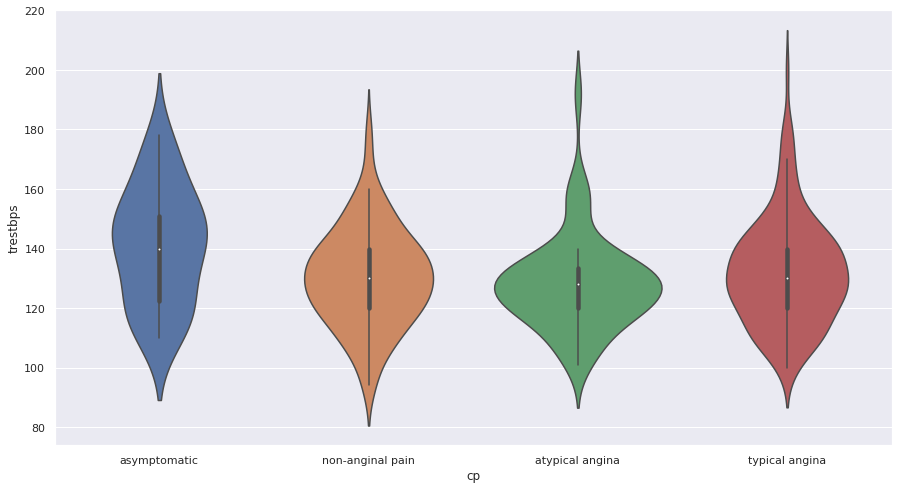

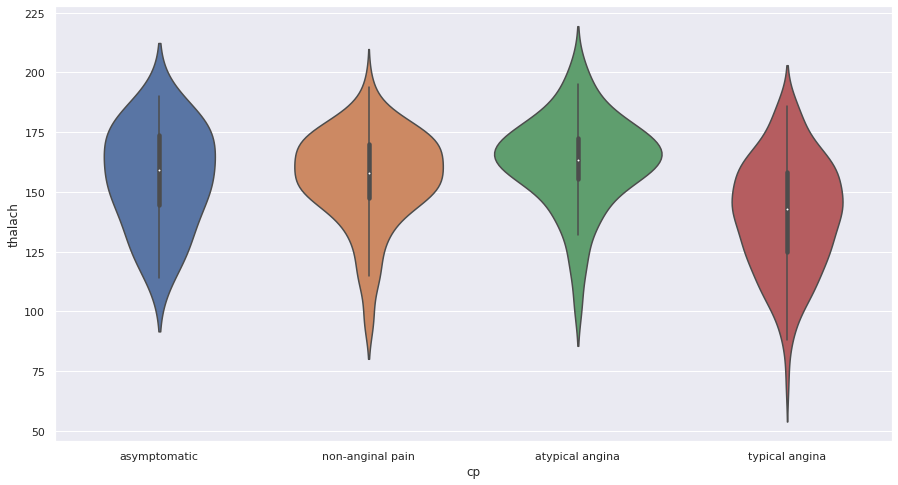

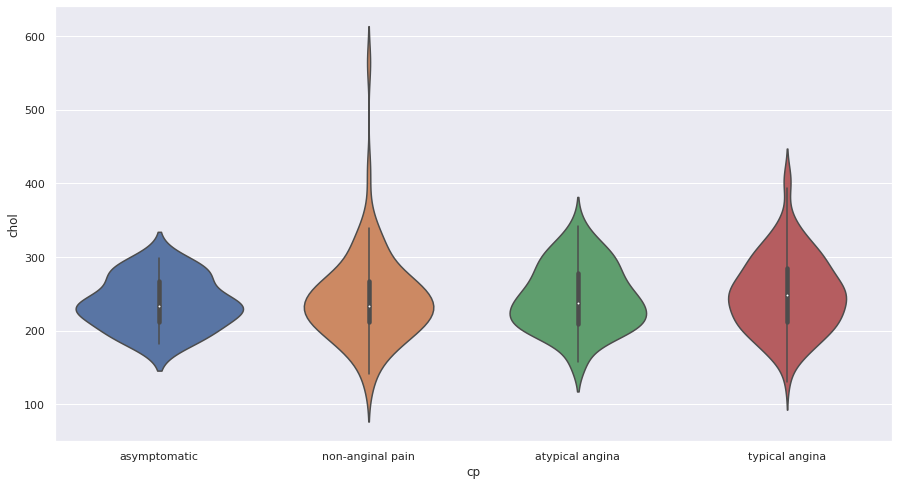

In [ ]:
cpnew = df.cp.map({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})
sb.violinplot(x = cpnew, y = df['trestbps'])
plt.show()
print(" ")
sb.violinplot(x = cpnew, y = df['thalach'])
plt.show()
print(" ")
sb.violinplot(x = cpnew, y = df['chol'])
plt.show()
print(" ")

Here we can see the distributions of different continuous variables contributing to different types of chest pain

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
abs_scaler = MaxAbsScaler()
abs_scaler.fit(df)
abs_scaler.max_abs_
scaled_data = abs_scaler.transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
df_scaled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.818182,1.0,1.000000,0.725,0.413121,1.0,0.0,0.742574,0.0,0.370968,0.0,0.00,0.333333,1.0
1,0.480519,1.0,0.666667,0.650,0.443262,0.0,0.5,0.925743,0.0,0.564516,0.0,0.00,0.666667,1.0
2,0.532468,0.0,0.333333,0.650,0.361702,0.0,0.0,0.851485,0.0,0.225806,1.0,0.00,0.666667,1.0
3,0.727273,1.0,0.333333,0.600,0.418440,0.0,0.5,0.881188,0.0,0.129032,1.0,0.00,0.666667,1.0
4,0.740260,0.0,0.000000,0.600,0.627660,0.0,0.5,0.806931,1.0,0.096774,1.0,0.00,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.740260,0.0,0.000000,0.700,0.427305,0.0,0.5,0.608911,1.0,0.032258,0.5,0.00,1.000000,0.0
299,0.584416,1.0,1.000000,0.550,0.468085,0.0,0.5,0.653465,0.0,0.193548,0.5,0.00,1.000000,0.0
300,0.883117,1.0,0.000000,0.720,0.342199,1.0,0.5,0.698020,0.0,0.548387,0.5,0.50,1.000000,0.0
301,0.740260,1.0,0.000000,0.650,0.232270,0.0,0.5,0.569307,1.0,0.193548,0.5,0.25,1.000000,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler
df = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
standardScaler = StandardScaler()
columns_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_scale] = standardScaler.fit_transform(df[columns_scale])
df
#scaling and one hot bit encoding

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1


In [ ]:
test = df.sample(frac = 0.3, replace = False)
val = test.sample(frac = 0.5,replace=False)
test.drop(val.index)
train = df.drop(test.index)
X_train, X_test, X_val  = train.drop(['target'], axis = 1), test.drop(['target'], axis = 1), val.drop(['target'], axis = 1)
y_train, y_test, y_val = train['target'], test['target'], val['target']
#test train split

Support Vector Machine Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() 
svc.fit(X_train,y_train)
y_predsvc=svc.predict(X_val)
y_predsvc1=svc.predict(X_test)
print('Model accuracy score of val with default hyperparameters: {}'. format(accuracy_score(y_val, y_predsvc))) 
print('Model accuracy score of test with default hyperparameters: {}'. format(accuracy_score(y_test, y_predsvc1)))

Model accuracy score of val with default hyperparameters: 0.717391304347826
Model accuracy score of test with default hyperparameters: 0.8021978021978022


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
scorer = make_scorer(mean_squared_error, greater_is_better=False)
param_gridsvc = [{'C': [1,10,100,1000,10000],'gamma': [1,0.1,0.01,0.001,0.0001],'kernel': ['rbf']}]
#grid = GridSearchCV(SVC(), param_grid, cv=5 , scoring = scorer )#refit = True, verbose = 3)
gridsvc = GridSearchCV(SVC(), param_gridsvc,refit=True,cv=5,scoring=scorer)
gridsvc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000, 10000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
import numpy as np
best_gridsvc = gridsvc.best_estimator_
grid_accuracysvc = evaluate(best_gridsvc, X_val, y_val)


Model Performance
Average Error: 0.1522 degrees.
Accuracy = -inf%.


In [ ]:
print(gridsvc.best_params_)
print(gridsvc.best_estimator_)
grid_valsvc = gridsvc.predict(X_val)
grid_testsvc1=gridsvc.predict(X_test)
print('Model accuracy score of val with best hyperparameters: {}'. format(accuracy_score(y_val, grid_valsvc ))) 
print('Model accuracy score of test with best hyperparameters: {}'. format(accuracy_score(y_test, grid_testsvc1)))


{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.001)
Model accuracy score of val with best hyperparameters: 0.8478260869565217
Model accuracy score of test with best hyperparameters: 0.8571428571428571


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train);
predictions = rfc.predict(X_val)
y_pred1=rfc.predict(X_test)
print('Model accuracy score of val with default hyperparameters: {}'. format(accuracy_score(y_val, predictions))) 
print('Model accuracy score of test with default hyperparameters: {}'. format(accuracy_score(y_test, y_pred1)))

Model accuracy score of val with default hyperparameters: 0.6956521739130435
Model accuracy score of test with default hyperparameters: 0.7692307692307693


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'bootstrap': [True],'n_estimators': [100, 200, 300],'min_samples_leaf': [1, 3, 5],'min_samples_split': [2, 4, 6,8]}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
grid_search.best_params_
best_grid = grid_search.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [ ]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)
grid_val = grid_search.predict(X_val)
grid_test=grid_search.predict(X_test)
print('Model accuracy score of val with best hyperparameters: {}'. format(accuracy_score(y_val, grid_val ))) 
print('Model accuracy score of test with best hyperparameters: {}'. format(accuracy_score(y_test, grid_test)))


{'bootstrap': True, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
RandomForestClassifier(min_samples_leaf=5, n_estimators=200)
Model accuracy score of val with best hyperparameters: 0.7857142857142857
Model accuracy score of test with best hyperparameters: 0.8681318681318682


K Neighbours Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier() 
knc.fit(X_train,y_train)
y_pred=knc.predict(X_val)
y_pred1=knc.predict(X_test)
print('Model accuracy score of val with default hyperparameters: {}'. format(accuracy_score(y_val, y_pred))) 
print('Model accuracy score of test with default hyperparameters: {}'. format(accuracy_score(y_test, y_pred1)))

Model accuracy score of val with default hyperparameters: 0.7608695652173914
Model accuracy score of test with default hyperparameters: 0.8241758241758241


In [ ]:
gridparams = {
    'weights':['uniform', 'distance'],
    'n_neighbors' : [3,7,15,13],
}
gridk = GridSearchCV(KNeighborsClassifier(),
                    gridparams, 
                    n_jobs = -1, 
                    verbose = 1, cv=3)
gridk.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 7, 15, 13],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
print(gridk.best_params_)
print(gridk.best_estimator_)
grid_valk = gridk.predict(X_val)
grid_testk=gridk.predict(X_test)
print('Model accuracy score of val with best hyperparameters: {}'. format(accuracy_score(y_val, grid_valk ))) 
print('Model accuracy score of test with best hyperparameters: {}'. format(accuracy_score(y_test, grid_testk)))

{'n_neighbors': 13, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=13)
Model accuracy score of val with best hyperparameters: 0.782608695652174
Model accuracy score of test with best hyperparameters: 0.8571428571428571


MLP Classifier

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
sknet = MLPClassifier(batch_size = 32,hidden_layer_sizes=(30,30,2), learning_rate_init=0.005, activation='relu',alpha=0.1, learning_rate= 'constant', max_iter=5000, solver= 'adam')
sknet.fit(X_train, y_train)
preds_train = sknet.predict(X_train)
preds_testb = sknet.predict(X_test)
preds_valb = sknet.predict(X_val)
print("Test accuracy of sklearn neural network: {}".format(accuracy_score(preds_testb, y_test)))
print("Val accuracy of sklearn neural network: {}".format(accuracy_score(preds_valb, y_val)))

Test accuracy of sklearn neural network: 0.7582417582417582
Val accuracy of sklearn neural network: 0.782608695652174


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
params = {
    'activation':['tanh', 'relu', 'logistic'],
    'alpha' : [0.001,0.01, 1,0.1],
    'learning_rate' : ['constant','invscaling', 'adaptive'],
    'solver' : ['sgd', 'adam']
}
grid = GridSearchCV(MLPClassifier(batch_size = 32, solver = 'adam', hidden_layer_sizes = (30,30,2), learning_rate_init=0.005), 
                    params, 
                    n_jobs = -1, 
                    verbose = 2, 
                    return_train_score = True)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=MLPClassifier(batch_size=32,
                                     hidden_layer_sizes=(30, 30, 2),
                                     learning_rate_init=0.005),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [0.001, 0.01, 1, 0.1],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['sgd', 'adam']},
             return_train_score=True, verbose=2)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)
#grid_predictions = grid.predict(X_val)
#print('Model accuracy score with best hyperparameters: {0:0.4f}'. format(accuracy_score(y_val, grid_predictions)*100))
preds_testa = grid.predict(X_test)
preds_vala = grid.predict(X_val)
print("Test accuracy of sklearn neural network: {}".format(accuracy_score(preds_testa, y_test)))
print("Val accuracy of sklearn neural network: {}".format(accuracy_score(preds_vala, y_val)))

{'activation': 'tanh', 'alpha': 0.1, 'learning_rate': 'invscaling', 'solver': 'adam'}
MLPClassifier(activation='tanh', alpha=0.1, batch_size=32,
              hidden_layer_sizes=(30, 30, 2), learning_rate='invscaling',
              learning_rate_init=0.005)
Test accuracy of sklearn neural network: 0.7802197802197802
Val accuracy of sklearn neural network: 0.8043478260869565


Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score
nbs=GaussianNB() 
nbs.fit(X_train,y_train)
y_pred=nbs.predict(X_val)
y_pred1=nbs.predict(X_test)
print('Model accuracy score of val with default hyperparameters: {}'. format(accuracy_score(y_val, y_pred))) 
print('Model accuracy score of test with default hyperparameters: {}'. format(accuracy_score(y_test, y_pred1)))

Model accuracy score of val with default hyperparameters: 0.8478260869565217
Model accuracy score of test with default hyperparameters: 0.8021978021978022


There is no hyperparameter so no need for grid search

Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)
y_pred=model.predict(X_val)
y_pred1=model.predict(X_test)
print('Model accuracy score of val with default hyperparameters: {}'. format(accuracy_score(y_val, y_pred))) 
print('Model accuracy score of test with default hyperparameters: {}'. format(accuracy_score(y_test, y_pred1)))


Model accuracy score of val with default hyperparameters: 0.8260869565217391
Model accuracy score of test with default hyperparameters: 0.7912087912087912


Deep learning

In [ ]:
from sklearn.preprocessing import StandardScaler , LabelEncoder
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
model = Sequential()

model.add(Dense(12))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(12))
model.add(Activation('relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics =['mae','accuracy'])


Epoch 1/200
7/7 [==============================] - 1s 39ms/step - loss: 0.6908 - mae: 0.4973 - accuracy: 0.5236 - val_loss: 0.6814 - val_mae: 0.4925 - val_accuracy: 0.6522
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6758 - mae: 0.4897 - accuracy: 0.5755 - val_loss: 0.6713 - val_mae: 0.4870 - val_accuracy: 0.6522
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6623 - mae: 0.4824 - accuracy: 0.6132 - val_loss: 0.6627 - val_mae: 0.4821 - val_accuracy: 0.7391
Epoch 4/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6534 - mae: 0.4775 - accuracy: 0.6226 - val_loss: 0.6546 - val_mae: 0.4773 - val_accuracy: 0.7391
Epoch 5/200
7/7 [==============================] - 0s 7ms/step - loss: 0.6445 - mae: 0.4721 - accuracy: 0.6415 - val_loss: 0.6463 - val_mae: 0.4723 - val_accuracy: 0.7609
Epoch 6/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6289 - mae: 0.4632 - accuracy: 0.6745 - val_loss: 0.6379 - val_mae: 0.4

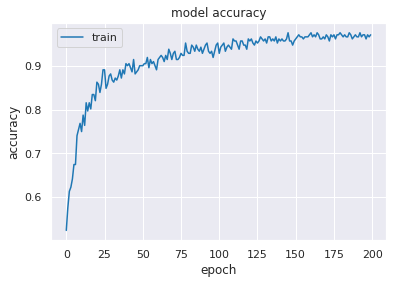

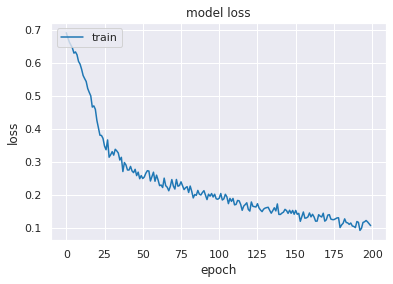

[[30 12]
 [ 4 45]]
0.8241758241758241
percentage Accuracy :  82.41758241758241


In [ ]:


history_1 = model.fit(X_train,y_train, validation_data= (X_val, y_val),batch_size = 32 ,epochs = 200)
plt.plot(history_1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.plot(history_1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
y_pred_1 = model.predict(X_test)
y_pred_1 = (y_pred_1 > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_1)
print(cm)
print(accuracy_score(y_test, y_pred_1))

pred_1 = 100*accuracy_score(y_test,y_pred_1)
print('percentage Accuracy : ',pred_1)


In [ ]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 12)                372       
                                                                 
 activation_100 (Activation)  (None, 12)               0         
                                                                 
 flatten_33 (Flatten)        (None, 12)                0         
                                                                 
 dense_105 (Dense)           (None, 12)                156       
                                                                 
 activation_101 (Activation)  (None, 12)               0         
                                                                 
 dropout_26 (Dropout)        (None, 12)                0         
                                                                 
 dense_106 (Dense)           (None, 1)               